In [37]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import json
sns.set()
sns.set_style("white")

## Part 1 ‐ Exploratory data analysis

In [39]:
with open('logins.json','r') as json_file:
    logins_json = json.load(json_file)

In [40]:
logins=pd.DataFrame(logins_json)

In [41]:
logins['login_time']=pd.to_datetime(logins['login_time'], format='%Y-%m-%d %H:%M:%S')

In [42]:
logins['count'] = 1

In [43]:
logins.set_index('login_time',inplace=True)

In [44]:
# resampling data into 15 minute time intervals 
logins15=logins.resample('15T').count()

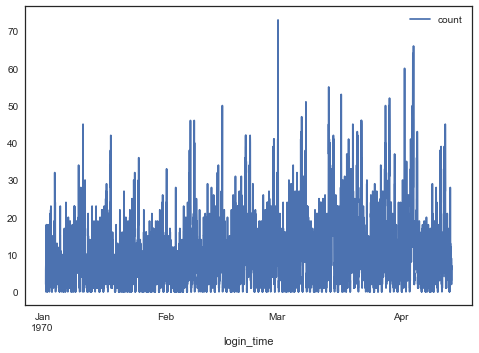

In [45]:
logins15.plot();

Time plot of count of logins per 15 minutes generally shows that number number of counts increases every month (the plot becomes denser towards April), till it starts dropping after April. Also the number of data for April seems smaller than for other months, which should be confirmed.

In [46]:
# creating bigger time intervals
logins15['hour']=logins15.index.hour
logins15['month']=logins15.index.month
logins15['dayofweek']=logins15.index.dayofweek

In [47]:
#Confirming number of entries per month
logins15['month'].value_counts()

3    2976
1    2896
2    2688
4    1228
Name: month, dtype: int64

In [48]:
logins15.tail()

,count,hour,month,dayofweek
login_time,,,,
1970-04-13 17:45:00,5,17,4,0
1970-04-13 18:00:00,5,18,4,0
1970-04-13 18:15:00,2,18,4,0
1970-04-13 18:30:00,7,18,4,0
1970-04-13 18:45:00,6,18,4,0


Indeed there is around half of rows less for April. By looking at the table one can see that the last day for which data in April was collected was 13th of April. That means that April data is incomplete and should be used with caution, or removed from the investigation. In the rest of examples, only the first three months will be studied.
<br>
In the next step let's see confirm that there is an increase of demand every month.

/Users/michalczapski/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/Users/michalczapski/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


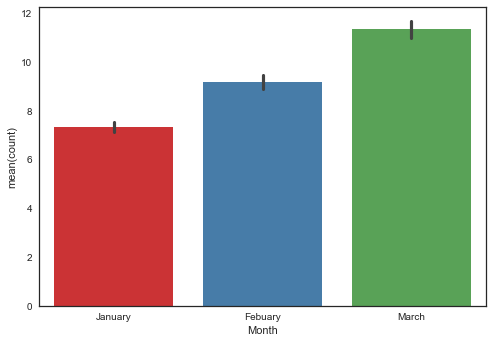

In [49]:
sns.barplot(x='month',y='count',data=logins15[logins15.month != 4],palette='Set1');
plt.xlabel('Month');
plt.xticks([0,1,2], ['January','Febuary','March']);

Average count per month plot confirmed a positive trend in the time series. On average there was around 7 logins per 15 minutes in January, that increased to around 11 logins per 15 minutes in March.
<br>
In the next step, a weekly demand cycle will be investigated

/Users/michalczapski/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/Users/michalczapski/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


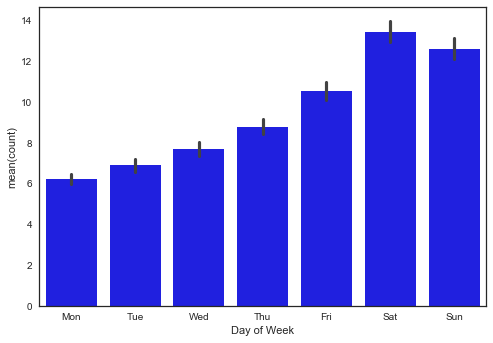

In [50]:
sns.barplot(x='dayofweek',y='count',data=logins15,color='blue');
plt.xlabel('Day of Week');
plt.xticks([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']);

On average, there is positive trend of number of logins per 15 minutes from Monday to Sunday, with the biggest demand observed during the weekend with the peak on Saturday, followed by a small drop on Sunday. Let's see if this trend is constant every month.

/Users/michalczapski/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/Users/michalczapski/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


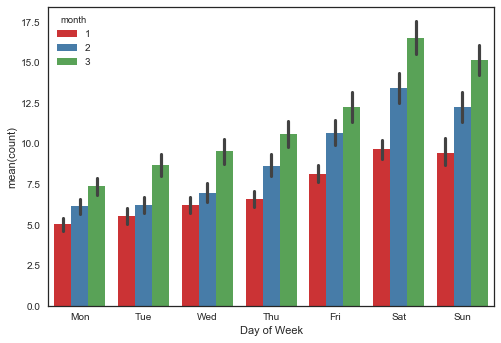

In [51]:
sns.barplot(x='dayofweek',y='count',data=logins15[logins15.month != 4],hue='month',palette='Set1');
plt.xlabel('Day of Week');
plt.xticks([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']);

Indeed, weekly cycle each month has a similar pattern as the averge weekly cycle of demand.
<br>
In the next step, daily cycle will be analyzed. 

/Users/michalczapski/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/Users/michalczapski/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


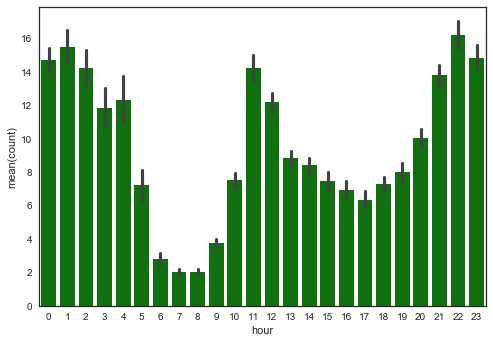

In [52]:
sns.barplot(x='hour',y='count',data=logins15,color='green');

An average daily cycle has two minima:
- global minimum at around 7 - 8 am, 
- local minimum at around 5 pm. 

There are three peaks observed:
- at around 1 am 
- at around 10 pm
- in the middle of the day (around 11 am). 

In the following step a daily cycle for each day of the week will be investigated.

/Users/michalczapski/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/Users/michalczapski/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


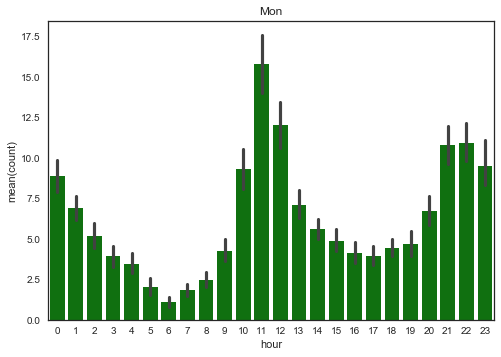

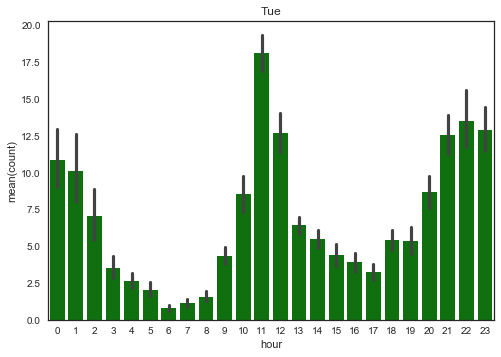

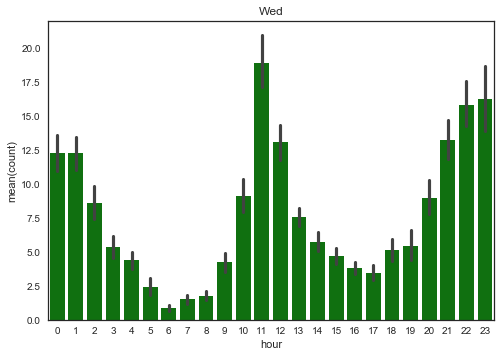

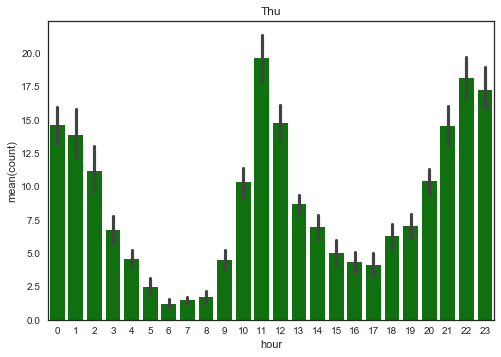

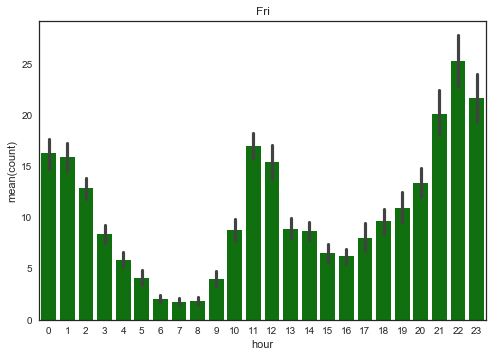

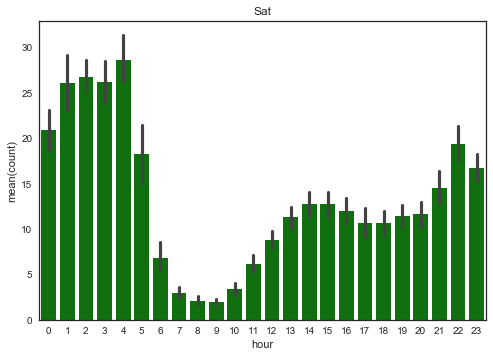

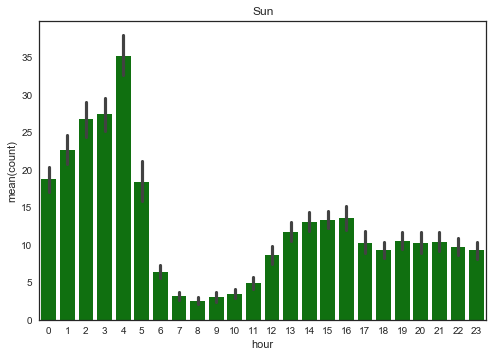

In [53]:
for day in range(7):
    weekday = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    sns.barplot(x='hour',y='count',data=logins15[logins15['dayofweek']== day],color='green')
    plt.title(weekday[day])

    plt.show()

Generally, two patterns can be observed:
- weekday cycle that is similar to the average daily cycle
- weekend cycle (Saturday and Sunday) with one global minimum at around 8 am and a peak around 2-3 am.

## Part 2 ‐ Experiment and metrics design

1. The key measure to observe impact of toll reimbursement, should show if the the driver decided to cross the bridge when they have a customer, therefore, the measurement should would be boolean variable that will be True if the a pick-up location city is different from a drop-off location city, otherwise if they are the same the variable will be False. The count of True and False values can idicate how successful this experiment is. 

2. I would conduct A/B test. In which a treatment group will be informed that all the toll costs will be reimbursed, and a control group which will continue business as usual. In each group I would count the number of observations for which key measure is either True or False.


* a.  
     - I would randomly select at least 500 drivers from both cities that will be informed that their toll costs will be fully reimbursed and a another at least 500 non-participants for control. I would set up a hypotheses:
      - null hypothesis: there is no signficant difference between the control and the treatment 
      - alternative hypothesis: there is signifcant difference between control and treatment
* b. 
     - Chi-squared test for independence will be conducted on the count of key measure for treatment and control group. 
     - The test will be conducted at 5% signficance level.
     - Chi - square test statistic will be used to evaluate the hypotheses for df = 1. 
* c. 
     - If we there is no signifcant difference observed between the control group and the treatment group i.e. there is no reason to reject the null hypothesis at the level of signficance decided that means that the toll reimbursement didn't have any impact on drivers behevior and they still prefer to drive in one city exclusively.  
   
     - If there is signifcant difference between the control group and the treatment that means that the toll reimbursement influenced drivers to drive between cities.
      
     - if the latter is true then the operations team should try to implement the change permanently. It is also worth it to post-segment drivers who work on those who work on the weekends and during the weekdays and see if the cities circadian rythms can also influence drivers behavior. 
     - It is also very important to have a big enough sample to avoid Type I error ( we reject null hypothesis when it is actually true and toll reimbursement had no impact on drivers' behavior) or Type II error (toll reimbursement has an impact on drivers' behavior but we didn't have enough evidence to support it)

## Part 3 ‐ Predictive modeling

In [54]:
file = 'ultimate_data_challenge.json'

In [55]:
with open(file,'r') as json_file:
    ultimate_json = json.load(json_file)

In [56]:
ultimate=pd.DataFrame(ultimate_json)

- Some columns (average rate of a driver,phone, average rating by driver) had a few hundred NaN values per column, those values were dropped since there values can't be inferred. Therefore the final table has 41744 rows so 83%  percent of the data was retained.
- In the first step the 'active' column with boolean values was created, showing if the user was active or not was created based on the difference between columns last_trip_date and signup_date. If the difference were less than 30 days then the value was True for that user, if it was more than 30 days the value was equal False.
- There is a big imbalance between too types of members. Active members group is around 3 smaller than non active members group ( 9687 vs. 32057 members, respectively). 

In [57]:
#changing dates to datetime objects
ultimate['signup_date']=pd.to_datetime(ultimate['signup_date'], format='%Y-%m-%d')
ultimate['last_trip_date']=pd.to_datetime(ultimate['last_trip_date'], format='%Y-%m-%d')

In [58]:
#calculating when user was last active (in days)
ultimate['last_active']=(ultimate['last_trip_date']-ultimate['signup_date']).apply(lambda x:x.days)

In [59]:
ultimate['active']=ultimate.last_active <= 30

In [60]:
ultimate.active.value_counts()

False    36973
True     13027
Name: active, dtype: int64

In [61]:
cols =['avg_dist', 'avg_rating_by_driver','avg_rating_of_driver', 'avg_surge', 'surge_pct','trips_in_first_30_days', 'weekday_pct'] 

Too visualize differences between active and non active users two types of plots were created:
- violin for numerical variables 
- bar plots for categorical variables 

/Users/michalczapski/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/Users/michalczapski/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/Users/michalczapski/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


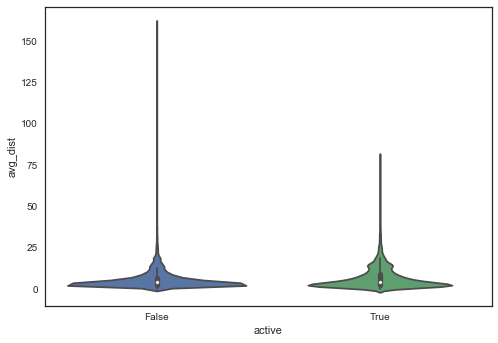

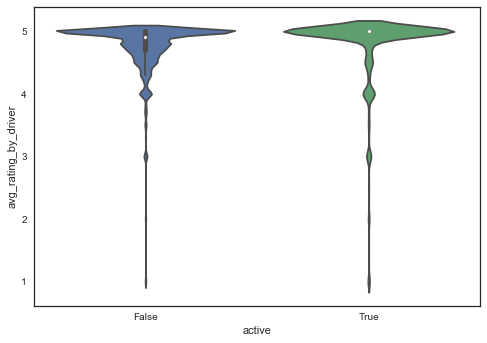

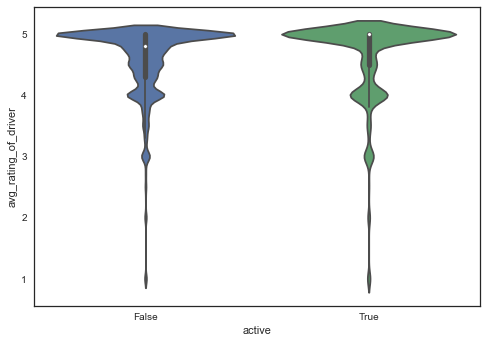

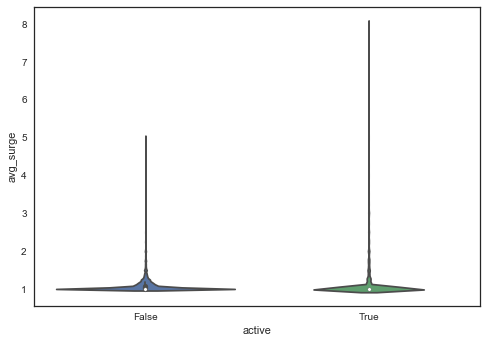

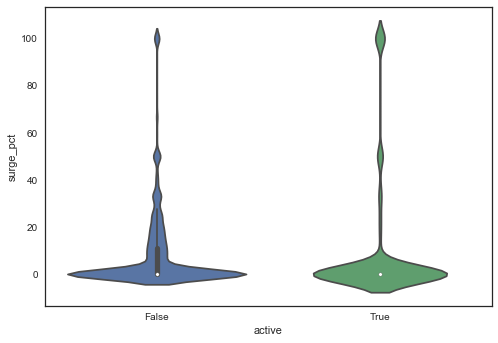

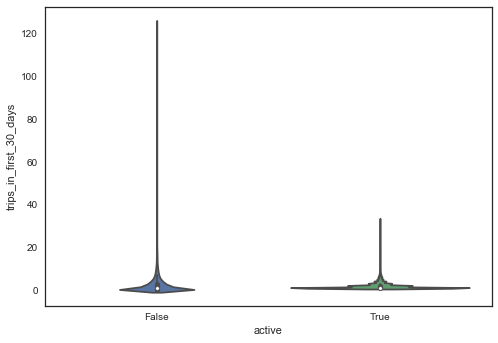

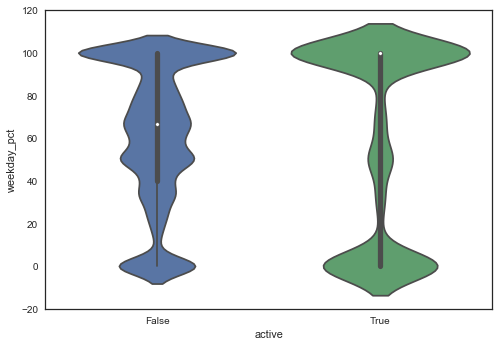

In [62]:
for col in cols:
    sns.violinplot(data=ultimate, x = 'active',y=col,jitter=True,alpha = 0.3);
    plt.show();

/Users/michalczapski/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


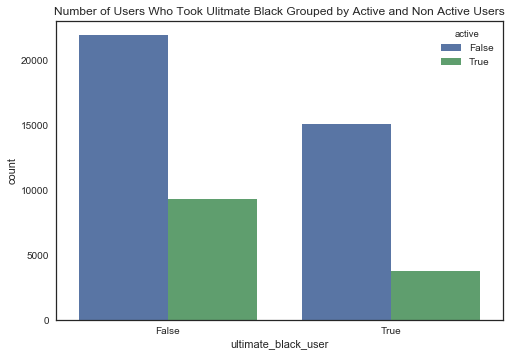

In [63]:
sns.countplot(x='ultimate_black_user',data=ultimate,hue ='active');
plt.title('Number of Users Who Took Ulitmate Black Grouped by Active and Non Active Users');

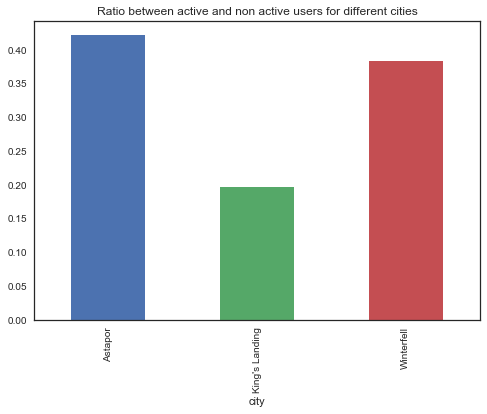

In [64]:
df=pd.DataFrame(ultimate.groupby(['city','active'])['last_active'].count())
df=df.unstack(level=1)
df['ratio']=df.iloc[:,1]/df.iloc[:,0]
df['ratio'].plot(kind='bar');
plt.title('Ratio between active and non active users for different cities');

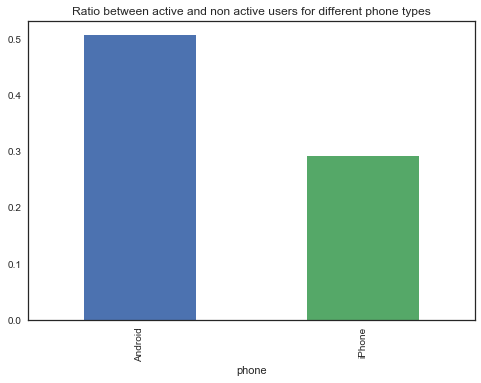

In [65]:
dfp=pd.DataFrame(ultimate.groupby(['phone','active'])['last_active'].count())
dfp=dfp.unstack(level=1)
dfp['ratio']=dfp.iloc[:,1]/dfp.iloc[:,0]
dfp['ratio'].plot(kind='bar');
plt.title('Ratio between active and non active users for different phone types');


In [66]:
#converting city and phone into dummy variables
ultimate_d=pd.get_dummies(ultimate,drop_first=True)

In [67]:
#ultimate_d.drop(columns=['avg_rating_of_driver'],inplace = True)

In [68]:
#dropping rows with NaN values
ultimate_d.dropna(axis=0,inplace = True)

In [75]:
ultimate_d.active.value_counts()

False    32057
True      9687
Name: active, dtype: int64

In [69]:
#average rating of driver has many NANs 
X=ultimate_d[['avg_dist',
              'avg_rating_of_driver',
 'avg_rating_by_driver',
 'avg_surge',
 'surge_pct',
 'trips_in_first_30_days',
 'ultimate_black_user',
 'weekday_pct',
 "city_King's Landing",
 'city_Winterfell',
 'phone_iPhone']]
y=ultimate_d['active']

- The visualizations showed that there are differences between active and non active users for all the features available there for all of them will be used in the model. 
- All categorical variables (city, phone, Ultimate Black User) were transformed into dummy variables. 
- Numerical variables were rescaled.
- Random Forest was the classifier of choice to predict if the user would be active in their 6th month. Random Fores has easily interpretable features, and requires little tuning, however is prone to overfitting.
- Other options are Gradient Boosting but it requires more parameter tuning. SVM is also a good classifier for prediction but its features are not easily interpretable. 
- Due to classes size imbalance, SMOTE technique was used to balance the classes in the model. 
- Accuracy and classification report were used to assess the model performance.

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_ = scaler.fit_transform(X)

[[8885  660]
 [ 671 9019]]
             precision    recall  f1-score   support

      False       0.93      0.93      0.93      9545
       True       0.93      0.93      0.93      9690

avg / total       0.93      0.93      0.93     19235

Accuracy:  0.9308032232908761
                        importance
feature                           
trips_in_first_30_days       0.366
weekday_pct                  0.165
avg_dist                     0.126
avg_rating_by_driver         0.124
surge_pct                    0.068
avg_rating_of_driver         0.060
avg_surge                    0.050
ultimate_black_user          0.013
city_King's Landing          0.011
phone_iPhone                 0.009
city_Winterfell              0.007


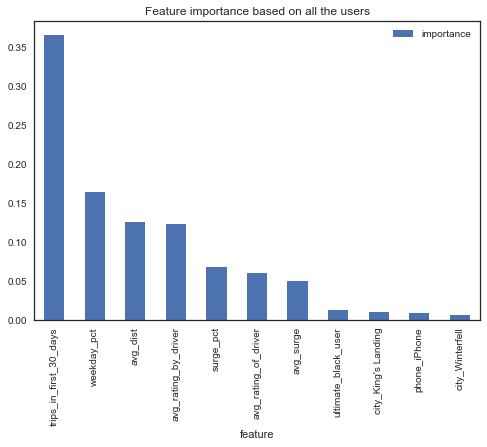

In [78]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X_, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3)
model= RandomForestClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions));
print(classification_report(y_test,predictions));
print("Accuracy: ", accuracy_score(y_test,predictions));
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print( importances);
importances.plot.bar();
plt.title('Feature importance based on all the users');

- The model achieved accuracy average accuracy of 93%. It scored also around 93% on average in precision, recall and F1-score on the test data. The untrained model would score on average 50%, therefore 43% increase in accuracy is significant. 
- Additionally, Random forest can help to analyze the most contributing features. One can see that number of trips in the 30 first days is the strongest contributor, followed by average distance in the first 30 days after signup  and number of trips occuring during the weekday. 
- Those insights can be used to in the marketing strategy for example by creating discounts for the first 10 rides, or weekday discounts.